# Trích xuất đặc trưng cho SmallDS

Import thư viện

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Đọc file csv

In [64]:
df = pd.read_csv('raw_data_1k.csv')
df['Recommended'] = df['Recommended'].replace({'yes': 1, 'no': 0})
df_raw = df.copy()
df = df.drop(df.columns[0], axis=1)
df.head(6)

,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,NaN,3,April 2023,3.0,1,3.0,0,New York to London,4,Economy Class,Business,1,4.0
1,Boeing 787,2,April 2023,1.0,3,5.0,0,Singapore to London,4,Business Class,Couple Leisure,1,1.0
2,Boeing 777,2,April 2023,1.0,3,1.0,0,Seattle to Zagreb via London,3,Premium Economy,Couple Leisure,2,1.0
3,Boeing 777,1,April 2023,2.0,1,3.0,0,"Bangalore to Toronto via London,",2,Premium Economy,Family Leisure,1,NaN
4,Dreamliner,1,February 2023,1.0,1,3.0,0,London to Denver,2,Economy Class,Family Leisure,2,1.0
5,A350,5,April 2023,4.0,4,3.0,1,London to Hong Kong,4,Premium Economy,Solo Leisure,4,NaN


In [65]:
df.drop(['Aircraft','Date Flown','Route'], axis=1, inplace=True)
df.to_csv("clean_data_1k.csv")
df.head()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,3,3.0,1,3.0,0,4,Economy Class,Business,1,4.0
1,2,1.0,3,5.0,0,4,Business Class,Couple Leisure,1,1.0
2,2,1.0,3,1.0,0,3,Premium Economy,Couple Leisure,2,1.0
3,1,2.0,1,3.0,0,2,Premium Economy,Family Leisure,1,NaN
4,1,1.0,1,3.0,0,2,Economy Class,Family Leisure,2,1.0


In [66]:
df.describe()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Seat Comfort,Value For Money,Wifi & Connectivity
count,1437.000000,1434.000000,1437.000000,1409.000000,1437.000000,1437.000000,1437.000000,526.000000
mean,3.326374,2.723849,3.046625,2.693400,0.421712,2.910230,2.774530,1.952471
std,1.456885,1.444639,1.390346,1.390294,0.494005,1.371573,1.417398,1.373083
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,0.000000,3.000000,3.000000,1.000000
75%,5.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000


# Missing value

In [67]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(df)

,Total,Percent
Wifi & Connectivity,911,0.633960
Inflight Entertainment,28,0.019485
Food & Beverages,3,0.002088
Cabin Staff Service,0,0.000000
Ground Service,0,0.000000
Recommended,0,0.000000
Seat Comfort,0,0.000000
Seat Type,0,0.000000
Type Of Traveller,0,0.000000
Value For Money,0,0.000000


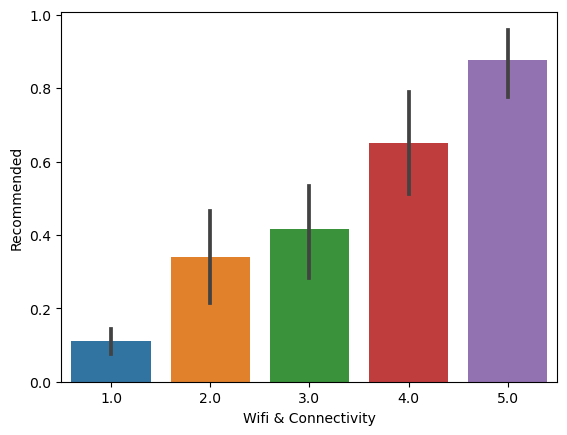

In [68]:
sns.barplot(x=df['Wifi & Connectivity'], y=df['Recommended']);

### Xử lý missing value bằng KT New Feature và Median

In [69]:
df['Wifi & Connectivity_NAN']=np.where(df['Wifi & Connectivity'].isnull(),1,0)

df['Inflight Entertainment'].fillna(df['Inflight Entertainment'].median(),inplace=True)

df['Food & Beverages'].fillna(df['Food & Beverages'].median(),inplace=True)
draw_missing_data_table(df)

,Total,Percent
Wifi & Connectivity,911,0.63396
Cabin Staff Service,0,0.00000
Food & Beverages,0,0.00000
Ground Service,0,0.00000
Inflight Entertainment,0,0.00000
Recommended,0,0.00000
Seat Comfort,0,0.00000
Seat Type,0,0.00000
Type Of Traveller,0,0.00000
Value For Money,0,0.00000


### Trực quan hóa dữ liệu trước và sau khi xử lý dữ liệu trống

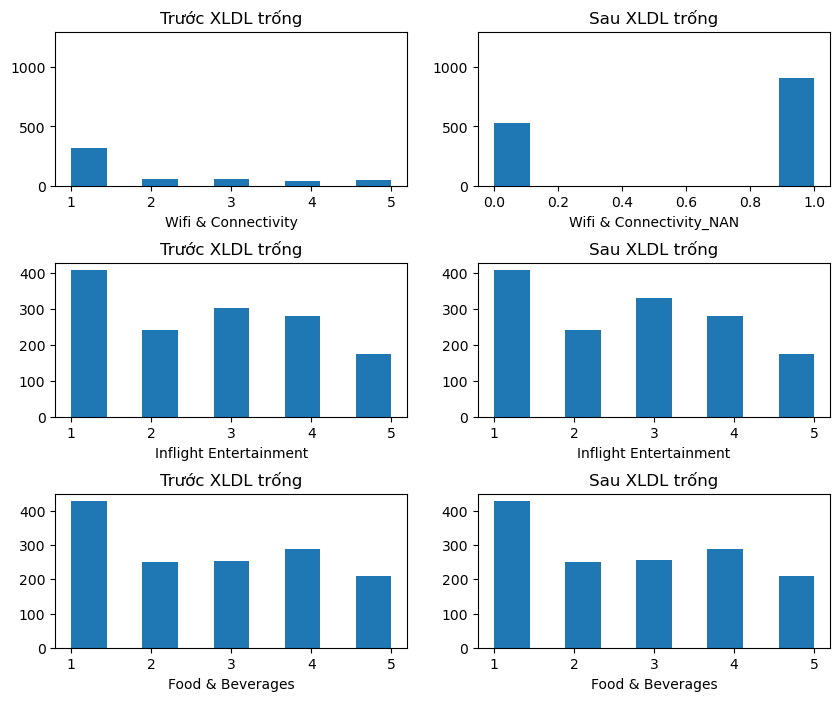

In [70]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

axs[0][0].hist(df_raw['Wifi & Connectivity'], bins=9)
axs[0][1].hist(df['Wifi & Connectivity_NAN'], bins=9)
axs[0][0].set_xlabel('Wifi & Connectivity')
axs[0][1].set_xlabel('Wifi & Connectivity_NAN')
axs[0][0].set_title('Trước XLDL trống')
axs[0][1].set_title('Sau XLDL trống')
axs[0][0].set_ylim(0, 1300)
axs[0][1].set_ylim(0, 1300)

axs[1][0].hist(df_raw['Inflight Entertainment'], bins=9)
axs[1][1].hist(df['Inflight Entertainment'], bins=9)
axs[1][0].set_xlabel('Inflight Entertainment')
axs[1][1].set_xlabel('Inflight Entertainment')
axs[1][0].set_title('Trước XLDL trống')
axs[1][1].set_title('Sau XLDL trống')

axs[2][0].hist(df_raw['Food & Beverages'], bins=9)
axs[2][1].hist(df['Food & Beverages'], bins=9)
axs[2][0].set_xlabel('Food & Beverages')
axs[2][1].set_xlabel('Food & Beverages')
axs[2][0].set_title('Trước XLDL trống')
axs[2][1].set_title('Sau XLDL trống')

plt.subplots_adjust(hspace=0.5)
plt.show()

# Feature Extraction
Trích xuất đặc trưng (feature extraction) đề cập đến quá trình chuyển đổi dữ liệu thô (raw data) thành các đặc trưng số (numerical feature)

In [71]:
df.head()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity,Wifi & Connectivity_NAN
0,3,3.0,1,3.0,0,4,Economy Class,Business,1,4.0,0
1,2,1.0,3,5.0,0,4,Business Class,Couple Leisure,1,1.0,0
2,2,1.0,3,1.0,0,3,Premium Economy,Couple Leisure,2,1.0,0
3,1,2.0,1,3.0,0,2,Premium Economy,Family Leisure,1,NaN,1
4,1,1.0,1,3.0,0,2,Economy Class,Family Leisure,2,1.0,0


In [72]:
print('Seat Type: ', df['Seat Type'].unique())

Seat Type:  ['Economy Class' 'Business Class' 'Premium Economy' 'First Class']


In [73]:
print('Type Of Traveller: ', df['Type Of Traveller'].unique())

Type Of Traveller:  ['Business' 'Couple Leisure' 'Family Leisure' 'Solo Leisure']


### Kĩ thuật One-hot Encoding cho 2 đặc trưng Seat Type và Type Of Traveller

In [74]:
encoded_df = pd.get_dummies(df, columns=['Seat Type', 'Type Of Traveller'])

In [75]:
encoded_df.drop('Wifi & Connectivity', axis=1, inplace=True)

Chuyển các giá trị sang kiểu Int

In [76]:
encoded_df['Food & Beverages'] = encoded_df['Food & Beverages'].astype(int)
encoded_df['Inflight Entertainment'] = encoded_df['Inflight Entertainment'].astype(int)
encoded_df['Seat Type_Business Class'] = encoded_df['Seat Type_Business Class'].astype(int)
encoded_df['Seat Type_Economy Class'] = encoded_df['Seat Type_Economy Class'].astype(int)
encoded_df['Seat Type_First Class'] = encoded_df['Seat Type_First Class'].astype(int)
encoded_df['Seat Type_Premium Economy'] = encoded_df['Seat Type_Premium Economy'].astype(int)
encoded_df['Type Of Traveller_Business'] = encoded_df['Type Of Traveller_Business'].astype(int)
encoded_df['Type Of Traveller_Couple Leisure'] = encoded_df['Type Of Traveller_Couple Leisure'].astype(int)
encoded_df['Type Of Traveller_Family Leisure'] = encoded_df['Type Of Traveller_Family Leisure'].astype(int)
encoded_df['Type Of Traveller_Solo Leisure'] = encoded_df['Type Of Traveller_Solo Leisure'].astype(int)
encoded_df.dtypes

Cabin Staff Service                 int64
Food & Beverages                    int32
Ground Service                      int64
Inflight Entertainment              int32
Recommended                         int64
Seat Comfort                        int64
Value For Money                     int64
Wifi & Connectivity_NAN             int32
Seat Type_Business Class            int32
Seat Type_Economy Class             int32
Seat Type_First Class               int32
Seat Type_Premium Economy           int32
Type Of Traveller_Business          int32
Type Of Traveller_Couple Leisure    int32
Type Of Traveller_Family Leisure    int32
Type Of Traveller_Solo Leisure      int32
dtype: object

In [77]:
encoded_df.head()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Seat Comfort,Value For Money,Wifi & Connectivity_NAN,Seat Type_Business Class,Seat Type_Economy Class,Seat Type_First Class,Seat Type_Premium Economy,Type Of Traveller_Business,Type Of Traveller_Couple Leisure,Type Of Traveller_Family Leisure,Type Of Traveller_Solo Leisure
0,3,3,1,3,0,4,1,0,0,1,0,0,1,0,0,0
1,2,1,3,5,0,4,1,0,1,0,0,0,0,1,0,0
2,2,1,3,1,0,3,2,0,0,0,0,1,0,1,0,0
3,1,2,1,3,0,2,1,1,0,0,0,1,0,0,1,0
4,1,1,1,3,0,2,2,0,0,1,0,0,0,0,1,0


# Feature Transformation
Biến đổi đặc trưng: Chuyển đổi các giá trị rating về khoảng từ 0 đến 1.

### Sử dụng Kỹ thuật Min Max Scaler

In [78]:
from sklearn.preprocessing import MinMaxScaler

rating_df = encoded_df.drop('Recommended', axis=1)
scaler = MinMaxScaler()
rating_df = scaler.fit_transform(rating_df)
rating_df = pd.DataFrame(rating_df, columns=['Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
                'Seat Comfort', 'Value For Money', 'Wifi & Connectivity_NAN', 'Seat Type_Business Class', 'Seat Type_Economy Class', 
                'Seat Type_First Class', 'Seat Type_Premium Economy','Type Of Traveller_Business', 'Type Of Traveller_Couple Leisure',
                'Type Of Traveller_Family Leisure', 'Type Of Traveller_Solo Leisure'])
rating_df['Recommended'] = encoded_df['Recommended']

In [79]:
rating_df.head()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Seat Comfort,Value For Money,Wifi & Connectivity_NAN,Seat Type_Business Class,Seat Type_Economy Class,Seat Type_First Class,Seat Type_Premium Economy,Type Of Traveller_Business,Type Of Traveller_Couple Leisure,Type Of Traveller_Family Leisure,Type Of Traveller_Solo Leisure,Recommended
0,0.50,0.50,0.0,0.5,0.75,0.00,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.25,0.00,0.5,1.0,0.75,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.25,0.00,0.5,0.0,0.50,0.25,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,0.00,0.25,0.0,0.5,0.25,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,0.00,0.00,0.0,0.5,0.25,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


### Trực quan hóa dữ liệu trước và sau khi chuẩn hóa

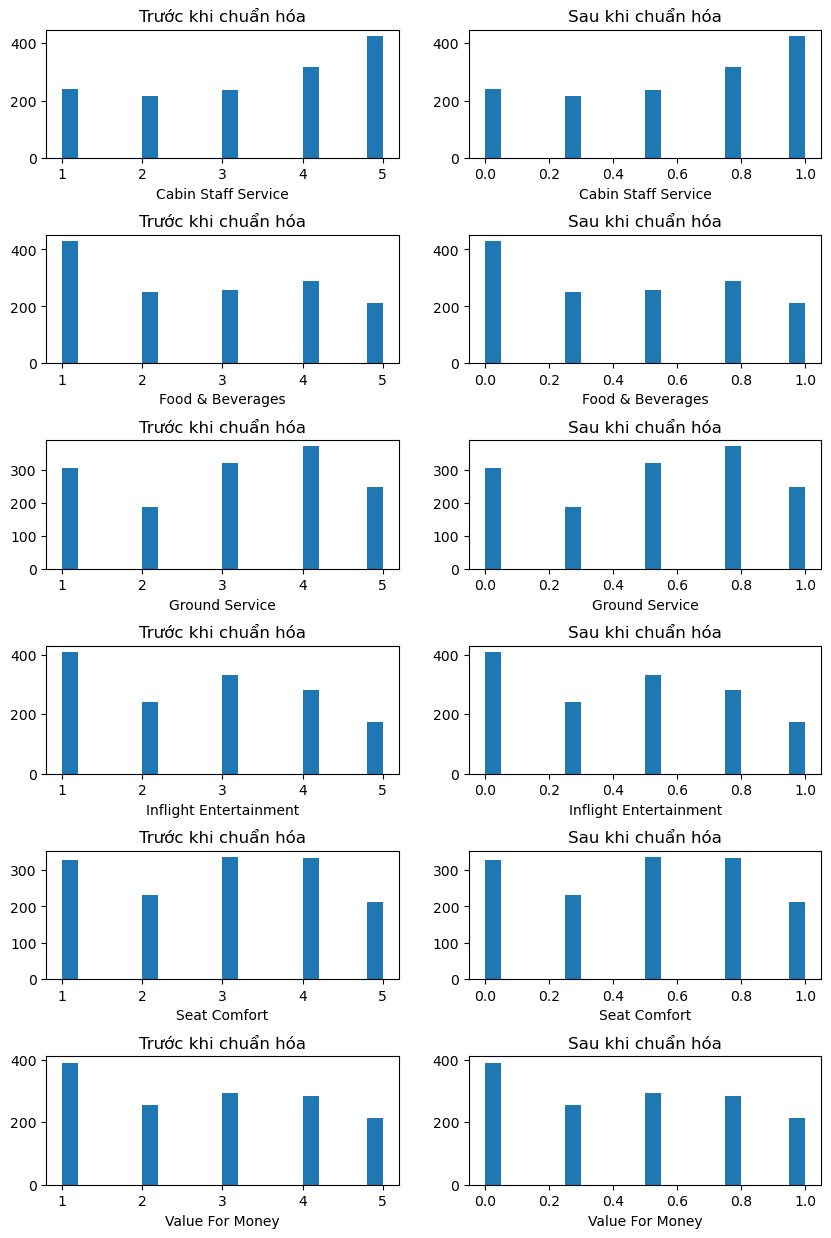

In [80]:
fig, axs = plt.subplots(6, 2, figsize=(10, 15))

texts = ['Cabin Staff Service','Food & Beverages','Ground Service','Inflight Entertainment','Seat Comfort',
         'Value For Money']
i = 0
for text in texts:
    axs[i][0].hist(encoded_df[text],bins=20)
    axs[i][0].set_xlabel(text)
    axs[i][0].set_title('Trước khi chuẩn hóa')
    axs[i][1].hist(rating_df[text],bins=20)
    axs[i][1].set_xlabel(text)
    axs[i][1].set_title('Sau khi chuẩn hóa')
    i += 1
    
plt.subplots_adjust(hspace=0.6)
plt.show()

# Feature Selection
Dùng SelectKBest và correlation_matrix để lựa chọn đặc trưng

### Ma trận tương quan

Index(['Cabin Staff Service', 'Food & Beverages', 'Ground Service',
       'Inflight Entertainment', 'Seat Comfort', 'Value For Money',
       'Recommended'],
      dtype='object')

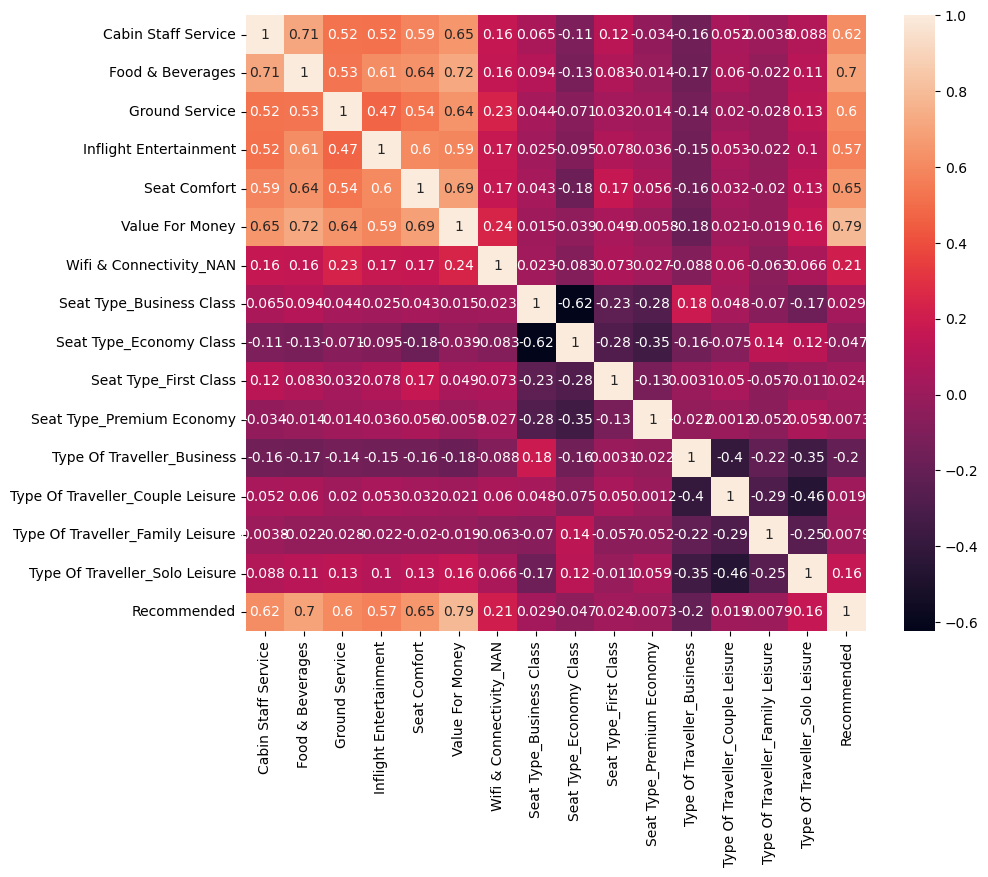

In [81]:
correlation_matrix = rating_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)

high_corr_features = correlation_matrix[abs(correlation_matrix['Recommended']) > 0.5].index
high_corr_features

### SelectKBest

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif

X = rating_df.drop('Recommended', axis=1)
y = rating_df['Recommended']

selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

feature_scores = [(feature, score) for feature, score in zip(X.columns, selector.scores_)]

sorted_feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)

for feature, score in sorted_feature_scores:
    print(f"{feature}: {score}")

Value For Money: 2387.2697647326327
Food & Beverages: 1373.8372440295725
Seat Comfort: 1032.552329693055
Cabin Staff Service: 889.0306014592894
Ground Service: 815.6132800880221
Inflight Entertainment: 698.9405640600461
Wifi & Connectivity_NAN: 66.2658429633254
Type Of Traveller_Business: 60.02466830800665
Type Of Traveller_Solo Leisure: 37.56297927393667
Seat Type_Economy Class: 3.1641455444964626
Seat Type_Business Class: 1.2461534441262452
Seat Type_First Class: 0.8191873479075332
Type Of Traveller_Couple Leisure: 0.5421540756535218
Type Of Traveller_Family Leisure: 0.08905925627561449
Seat Type_Premium Economy: 0.07579284671364737


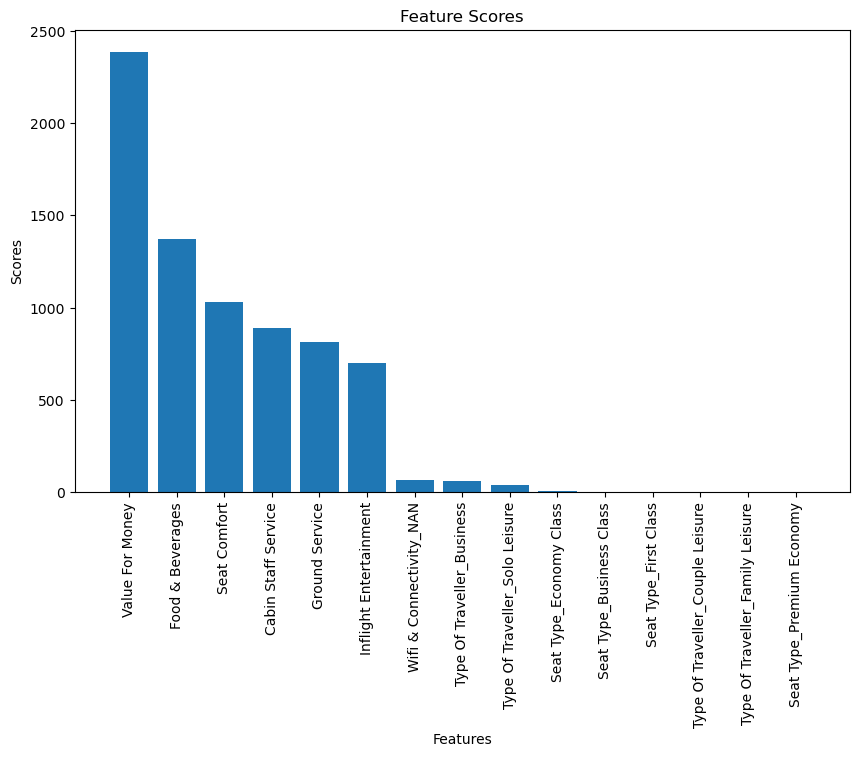

In [83]:
features = [feature for feature, _ in sorted_feature_scores]
scores = [score for _, score in sorted_feature_scores]

plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Feature Scores')
plt.show()

Final data

In [84]:
final_df = rating_df[['Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
                'Seat Comfort', 'Value For Money', 'Recommended']]
final_df.head(10)

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Seat Comfort,Value For Money,Recommended
0,0.50,0.50,0.00,0.5,0.75,0.00,0
1,0.25,0.00,0.50,1.0,0.75,0.00,0
2,0.25,0.00,0.50,0.0,0.50,0.25,0
3,0.00,0.25,0.00,0.5,0.25,0.00,0
4,0.00,0.00,0.00,0.5,0.25,0.25,0
5,1.00,0.75,0.75,0.5,0.75,0.75,1
6,0.75,0.00,0.00,0.5,0.00,0.00,0
7,1.00,0.25,0.75,0.5,0.25,0.00,0
8,0.00,0.00,0.25,0.0,0.25,0.25,0
9,0.50,0.75,0.50,0.5,0.50,0.25,0


In [85]:
final_df.to_csv("final_data_1k.csv")